In [1]:
import pandas as pd
import numpy as  np

#preprocessamento
from sklearn import preprocessing

#imagens
from IPython.display import Image as img


#bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter

#Classificadores / Algoritmos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


#Validação Modelo
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

Importando Arquivo XLSX

In [2]:
df_cesaria = pd.read_excel ('cesarianadataset.xlsx')

In [3]:
df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


Text(0.5, 0.98, 'Distribuição da Idade')

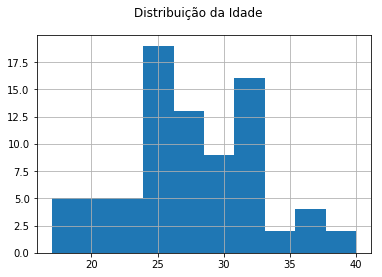

In [4]:
df_cesaria.idade.hist()
plt.suptitle('Distribuição da Idade')

In [5]:
df_cesaria.describe()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


Agrupamento por Idades

In [6]:
df_cesaria.idade.value_counts()

26    10
32     8
27     7
25     7
29     6
28     6
33     5
22     4
31     3
36     3
20     3
30     3
21     2
35     2
19     2
18     2
24     2
40     1
23     1
38     1
37     1
17     1
Name: idade, dtype: int64

Agrupamento por Cesariana

In [7]:
df_cesaria.Cesariana.value_counts()

1    46
0    34
Name: Cesariana, dtype: int64

Pré Processamento e Transformações

In [19]:
df_cesaria.loc[df_cesaria.idade  <=  18,'Faixa_idade'] = 'Adolescente'

df_cesaria.loc[(df_cesaria.idade >= 19) & (df_cesaria.idade < 22),'Faixa_idade']  = 'Jovem'

df_cesaria.loc[(df_cesaria.idade >= 22) & (df_cesaria.idade < 31),'Faixa_idade']  = 'Adulto'

df_cesaria.loc[(df_cesaria.idade >= 31) & (df_cesaria.idade < 41),'Faixa_idade']  = 'Experiente'

df_cesaria.loc[df_cesaria.idade  >= 41 ,'Faixa_idade'] = 'Senior'

In [20]:
df_cesaria.loc[df_cesaria.prblm_coracao  ==  0,'Ft_prblm_coracao']   = 'Apto'

df_cesaria.loc[df_cesaria.prblm_coracao  == 1,  'Ft_prblm_coracao']  = 'Inapto'

In [21]:
df_cesaria.loc[df_cesaria.pressao_sangue  ==  0,'Ft_pressao_sangue']   = 'Baixo'

df_cesaria.loc[df_cesaria.pressao_sangue  == 1,  'Ft_pressao_sangue']  = 'Normal'

df_cesaria.loc[df_cesaria.pressao_sangue  == 2,   'Ft_pressao_sangue'] = 'Alto'

In [22]:
df_cesaria.loc[df_cesaria.tempo_parto  ==  0,'Ft_tempo_parto']  = 'Pontual'

df_cesaria.loc[df_cesaria.tempo_parto  == 1, 'Ft_tempo_parto']  = 'Prematuro'

df_cesaria.loc[df_cesaria.tempo_parto  == 2, 'Ft_tempo_parto']  = 'Tardio'

In [23]:
df_cesaria.loc[df_cesaria.Cesariana   ==  0,'Clas_Cesariana']  = 'N'

df_cesaria.loc[df_cesaria.Cesariana   == 1, 'Clas_Cesariana']  = 'S'

In [24]:
df_cesaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 19 columns):
idade                80 non-null int64
nr_parto             80 non-null int64
tempo_parto          80 non-null int64
pressao_sangue       80 non-null int64
prblm_coracao        80 non-null int64
Cesariana            80 non-null int64
Faixa_idade          80 non-null object
Clas_Cesariana       80 non-null object
Prblm_Apto           80 non-null uint8
Prblm_Inapto         80 non-null uint8
Pressao_Alto         80 non-null uint8
Pressao_Baixo        80 non-null uint8
Pressao_Normal       80 non-null uint8
Parto_Pontual        80 non-null uint8
Parto_Prematuro      80 non-null uint8
Parto_Tardio         80 non-null uint8
Ft_prblm_coracao     80 non-null object
Ft_pressao_sangue    80 non-null object
Ft_tempo_parto       80 non-null object
dtypes: int64(6), object(5), uint8(8)
memory usage: 7.6+ KB


In [25]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit and transform in one step
df_cesaria['Norm_idade'] = scaler.fit_transform(df_cesaria[['idade']])


df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Faixa_idade,Clas_Cesariana,Prblm_Apto,Prblm_Inapto,Pressao_Alto,Pressao_Baixo,Pressao_Normal,Parto_Pontual,Parto_Prematuro,Parto_Tardio,Ft_prblm_coracao,Ft_pressao_sangue,Ft_tempo_parto,Norm_idade
0,22,1,0,2,0,0,Adulto,N,1,0,1,0,0,1,0,0,Apto,Alto,Pontual,0.217391
1,26,2,0,1,0,1,Adulto,S,1,0,0,0,1,1,0,0,Apto,Normal,Pontual,0.391304
2,26,2,1,1,0,0,Adulto,N,1,0,0,0,1,0,1,0,Apto,Normal,Prematuro,0.391304
3,28,1,0,2,0,0,Adulto,N,1,0,1,0,0,1,0,0,Apto,Alto,Pontual,0.478261
4,22,2,0,1,0,1,Adulto,S,1,0,0,0,1,1,0,0,Apto,Normal,Pontual,0.217391


In [96]:
print(df_cesaria.Norm_idade.min())
print(df_cesaria.Norm_idade.max())

0.0
1.0


In [ ]:
Análise Exploratória

Text(0.5, 1.0, 'Cesariana(S/N) por Idade')

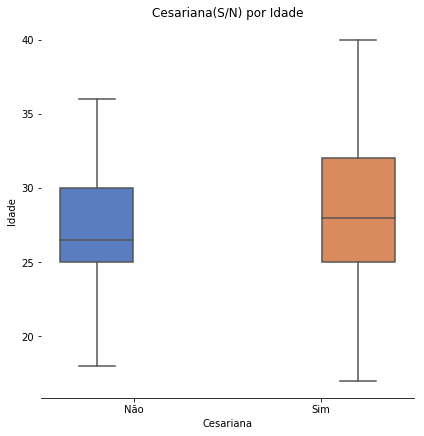

In [100]:
g = sns.factorplot(x="Clas_Cesariana",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Cesariana")
plt.title ('Cesariana(S/N) por Idade')

Text(0.5, 1.0, 'Cesariana(S/N) x prblm_coracao por Idade')

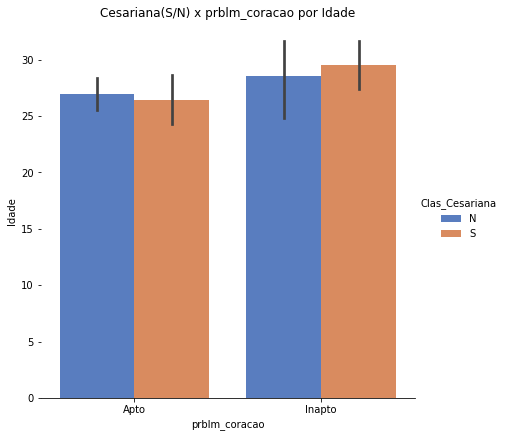

In [26]:
g = sns.factorplot(x="Ft_prblm_coracao",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("prblm_coracao")
plt.title ('Cesariana(S/N) x prblm_coracao por Idade')

Text(0.5, 1.0, 'Cesariana(S/N) x prblm_coracao por Idade')

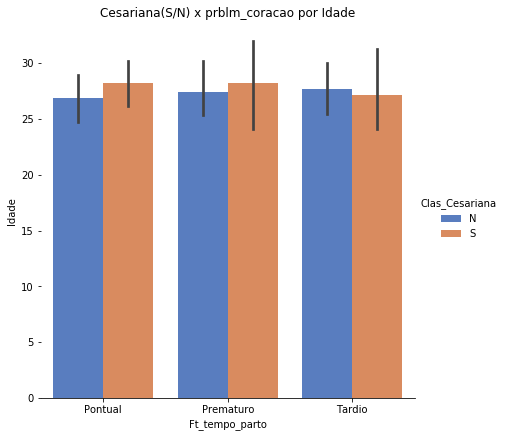

In [27]:
g = sns.factorplot(x="Ft_tempo_parto",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Ft_tempo_parto")
plt.title ('Cesariana(S/N) x prblm_coracao por Idade')

Text(0.5, 1.0, 'Cesariana(S/N) x prblm_coracao por Idade')

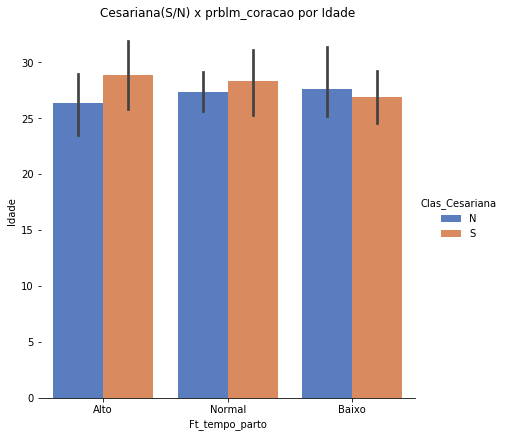

In [28]:
g = sns.factorplot(x="Ft_pressao_sangue",y="idade", hue ='Clas_Cesariana',data=df_cesaria,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Idade")
g = g.set_xlabels("Ft_tempo_parto")
plt.title ('Cesariana(S/N) x prblm_coracao por Idade')

Parto Pontual alta probabilidade de Cesarina.


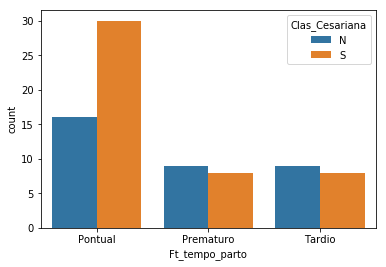

In [29]:
p = sns.countplot(data=df_cesaria,
                  x = 'Ft_tempo_parto',
                  hue = 'Clas_Cesariana')
print('Parto Pontual alta probabilidade de Cesarina.')

Pressão do Sangue normal indica alta probabilidade de Cesarina, como esperado


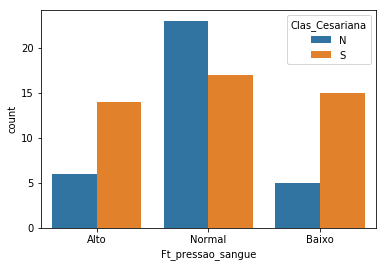

In [35]:
p = sns.countplot(data=df_cesaria,
                  x = 'Ft_pressao_sangue',
                  hue = 'Clas_Cesariana')
print('Pressão do Sangue normal indica alta probabilidade de Cesarina, como esperado')

Inapto Alta probabilidade de Cesariana


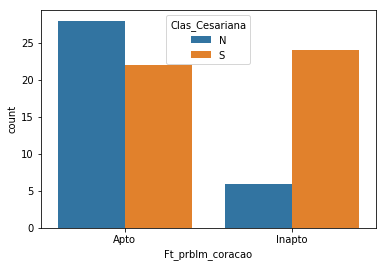

In [32]:
p = sns.countplot(data=df_cesaria,
                  x = 'Ft_prblm_coracao',
                  hue = 'Clas_Cesariana')
print('Inapto tem alta probabilidade de Cesariana')

Mulheres com 1 parto possuem mais chance de realizar cesariana


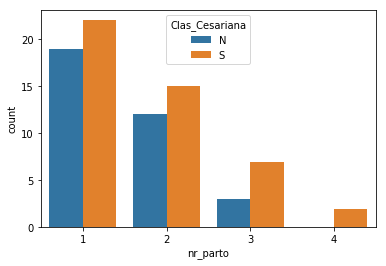

In [34]:
p = sns.countplot(data=df_cesaria,
                  x = 'nr_parto',
                  hue = 'Clas_Cesariana')
print('Mulheres com 1 parto possuem mais chance de realizar cesariana')

Mulheres com 29,32,33 e 36 anos possuem mais chance de realizar cesariana


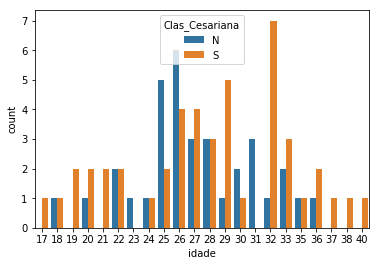

In [37]:
p = sns.countplot(data=df_cesaria,
                  x = 'idade',
                  hue = 'Clas_Cesariana')
print('Mulheres com 29,32,33 e 36 anos possuem mais chance de realizar cesariana')

Binarização

In [38]:
dfcesaria = df_cesaria.copy()

In [39]:
dfcesaria = dfcesaria.drop(labels =['idade',
                                    #'nr_parto',
                                    #'tempo_parto'       , 
                                    #'pressao_sangue'    ,
                                    #'prblm_coracao'       
                                    'Faixa_idade',
                                    'Norm_idade',
                                    'Ft_tempo_parto'       , 
                                    'Ft_pressao_sangue'    ,
                                    'Ft_prblm_coracao'       ,
                                    'Clas_Cesariana'],axis = 1
                                   )

In [40]:
dfcesaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
nr_parto           80 non-null int64
tempo_parto        80 non-null int64
pressao_sangue     80 non-null int64
prblm_coracao      80 non-null int64
Cesariana          80 non-null int64
Prblm_Apto         80 non-null uint8
Prblm_Inapto       80 non-null uint8
Pressao_Alto       80 non-null uint8
Pressao_Baixo      80 non-null uint8
Pressao_Normal     80 non-null uint8
Parto_Pontual      80 non-null uint8
Parto_Prematuro    80 non-null uint8
Parto_Tardio       80 non-null uint8
dtypes: int64(5), uint8(8)
memory usage: 3.8 KB


Dividindo o dataset em treinamento e teste ( 70% treinamento e 30% teste)

In [41]:
from sklearn.model_selection import train_test_split
y = np.array(dfcesaria[["Cesariana"]])
X = np.array(dfcesaria.drop(labels = ["Cesariana"],axis = 1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
classifier = RandomForestClassifier(random_state=20,criterion='gini',max_depth=3 )
    
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [43]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.734375
0.8125


In [ ]:
Predição Dataset teste

In [44]:
y_pred  = classifier.predict(X_test)

In [ ]:
Validação Matriz de Confunsão ( Confusion matrix )

In [45]:
print(confusion_matrix(y_test,y_pred))

[[7 1]
 [2 6]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

   micro avg       0.81      0.81      0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16



Escolhendo o Melhor Algortimo

In [47]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)

NameError: name 'gsadaDTC' is not defined

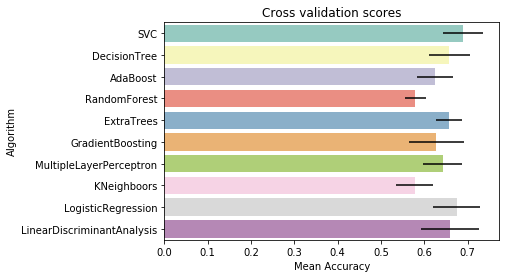

In [48]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

ada_best = gsadaDTC.best_estimator_

Hyperparameter tunning

In [49]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 0.1],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 162 out of 162 | elapsed:    6.7s finished


0.703125

In [50]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  84 out of  84 | elapsed:    0.1s finished


0.6875

In [51]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:    1.9s finished


0.59375

In [52]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 0.1],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 162 out of 162 | elapsed:    5.5s finished


0.6875

In [53]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 336 out of 336 | elapsed:    0.3s finished


0.65625

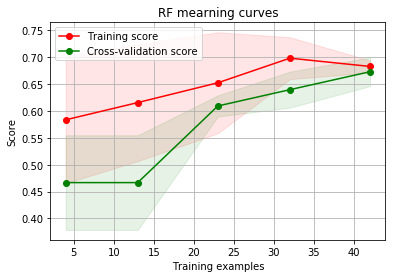

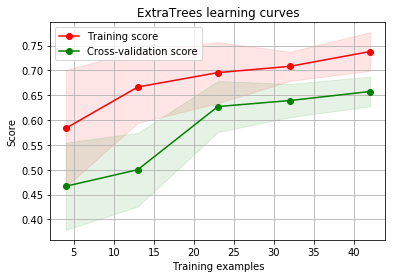

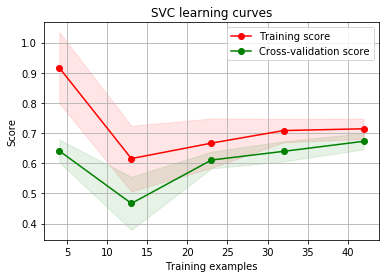

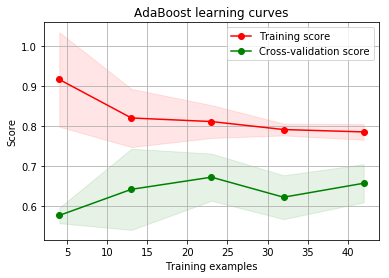

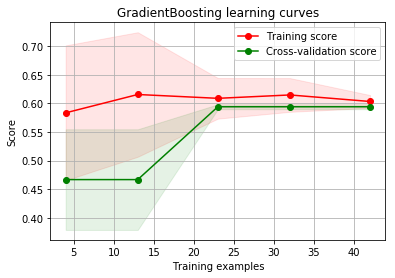

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

Conclusão o melhor modelo foi SVC